In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
data = pd.read_csv("c:/Users/aliho/Downloads/data1.csv")
data.head(10)


,Open,High,Low,Close,Adj Close,Volume,Date
0,2419,2467,2422,2452,2452,119870436,2024-08-28
1,2409,2450,2388,2419,2419,74222917,2024-08-27
2,2402,2449,2375,2409,2409,130059624,2024-08-26
3,2363,2410,2332,2402,2402,71469789,2024-08-24
4,2344,2380,2298,2363,2363,66048966,2024-08-21
5,2376,2390,2329,2344,2344,89762810,2024-08-20
6,2347,2393,2340,2376,2376,131098501,2024-08-19
7,2314,2360,2360,2347,2347,37859857,2024-08-18
8,2289,2334,2334,2314,2314,29450156,2024-08-17
9,2269,2291,2257,2289,2289,50609469,2024-08-14


In [251]:


# Assuming 'data' and 'option' DataFrames are already defined



# Reading values from the 'option' DataFrame

initial_T1 = 10  # 2 days until expiration

# Calculate T1 for each row, decrementing by 1 for each subsequent row
option['T1'] = (initial_T1 - np.arange(len(option))) / 365

# Ensure that T1 does not go below zero
option['T1'] = option['T1'].clip(lower=0)

option['K1'] = 2000
option['r1'] = 0.25
option['vol1'] = 0.44

S = data['Close']  # Underlying Price

# Define a function to calculate d1, d2, C, and P for each row
def calculate_option(row):
    S = row['S']
    K = row['K1']
    T = row['T1']
    r = row['r1']
    vol = row['vol1']
    d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - (vol * np.sqrt(T))
    C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return pd.Series({'d1': d1, 'd2': d2, 'C': C, 'P': P})

# Apply the function to each row in the 'option' DataFrame
option[['d1', 'd2', 'C', 'P']] = option.apply(calculate_option, axis=1)

# Print the updated DataFrame

option.head(50)


C:\Users\aliho\AppData\Local\Temp\ipykernel_32956\90269607.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
C:\Users\aliho\AppData\Local\Temp\ipykernel_32956\90269607.py:28: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))


,Adj Close,Target,TargetClass,TargetNextClose,T1,K1,r1,vol1,S,d1,d2,C,P
0,2829,13.0,1,2864.0,0.027397,2000,0.25,0.44,2452,2.928192,2.855362,465.741334,8.951026e-02
1,2864,96.0,1,2851.0,0.024658,2000,0.25,0.44,2419,2.876721,2.807629,431.390801,9.995524e-02
2,2851,23.0,1,2755.0,0.021918,2000,0.25,0.44,2409,2.973044,2.907903,419.996043,6.710826e-02
3,2755,-12.0,0,2732.0,0.019178,2000,0.25,0.44,2402,3.114968,3.054034,411.603733,3.764274e-02
4,2732,-17.0,0,2744.0,0.016438,2000,0.25,0.44,2363,3.057532,3.001119,371.244450,4.213790e-02
5,2744,13.0,1,2761.0,0.013699,2000,0.25,0.44,2344,3.174144,3.122645,350.862534,2.493363e-02
6,2761,24.0,1,2748.0,0.010959,2000,0.25,0.44,2376,3.822553,3.776491,381.473663,1.710127e-03
7,2748,-12.0,0,2724.0,0.008219,2000,0.25,0.44,2347,4.082228,4.042338,351.105837,4.671575e-04
8,2724,-36.0,0,2736.0,0.005479,2000,0.25,0.44,2314,4.535755,4.503185,316.737895,4.417724e-05
9,2736,-20.0,0,2772.0,0.002740,2000,0.25,0.44,2289,5.901613,5.878582,290.369394,1.531970e-08


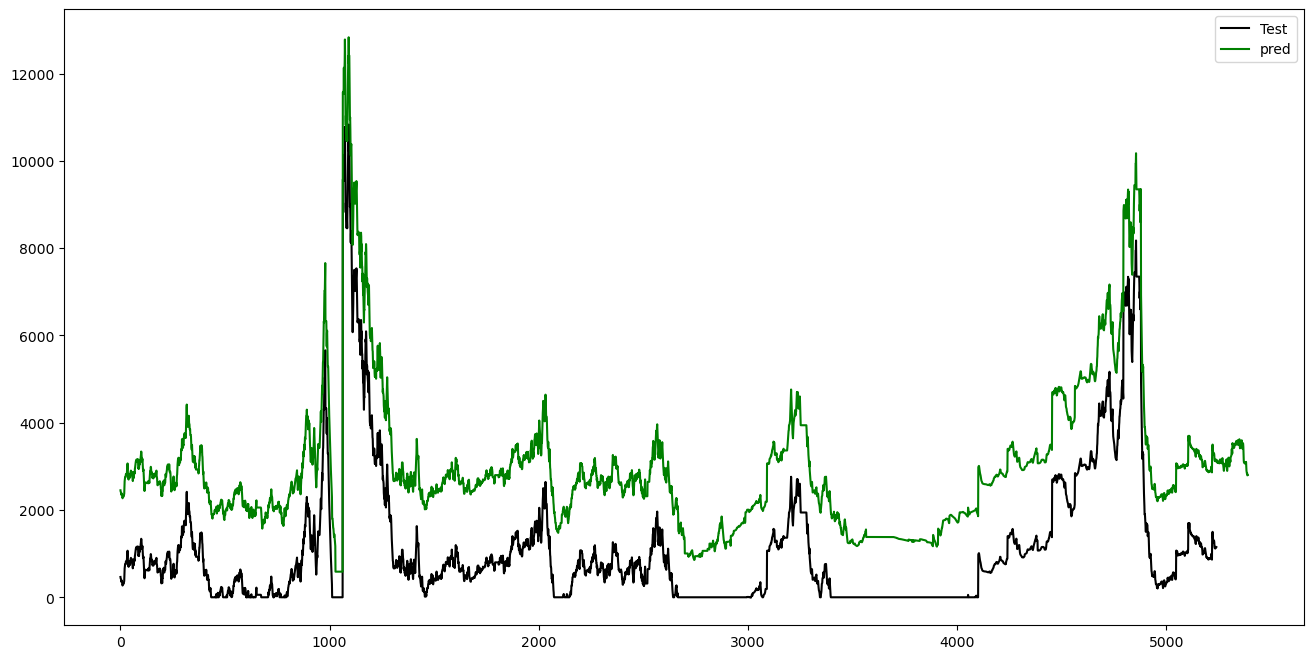

In [252]:
plt.figure(figsize=(16,8))
C = option['C']
plt.plot(C , color = 'black', label = 'Test')
plt.plot(S , color = 'green', label = 'pred')

plt.legend()
plt.show()


In [259]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

# Assuming 'data' and 'option' DataFrames are already defined

# Reading values from the 'option' DataFrame
initial_T1 = 10  # Start with 10 days until expiration

# Calculate T1 for each row, decrementing by 1 for each subsequent row
option['T1'] = (initial_T1 - np.arange(len(option))) / 365

# Ensure that T1 does not go below zero
option['T1'] = option['T1'].clip(lower=0)

option['K1'] = 2000
option['r1'] = 0.25
option['vol1'] = 0.44

option['S'] = data['Close']  # Underlying Price
option['Date'] = data['Date']  # Ensure Date is included

# Define a function to calculate d1, d2, C, and P for each row
def calculate_option(row):
    S = row['S']  # Get the 'S' value from the current row
    K = row['K1']
    T = row['T1']
    r = row['r1']
    vol = row['vol1']
    d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - (vol * np.sqrt(T))
    C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return pd.Series({'d1': d1, 'd2': d2, 'C': C, 'P': P})

# Apply the function to each row in the 'option' DataFrame
option[['d1', 'd2', 'C', 'P']] = option.apply(calculate_option, axis=1)




C:\Users\aliho\AppData\Local\Temp\ipykernel_32956\812392348.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
C:\Users\aliho\AppData\Local\Temp\ipykernel_32956\812392348.py:32: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))


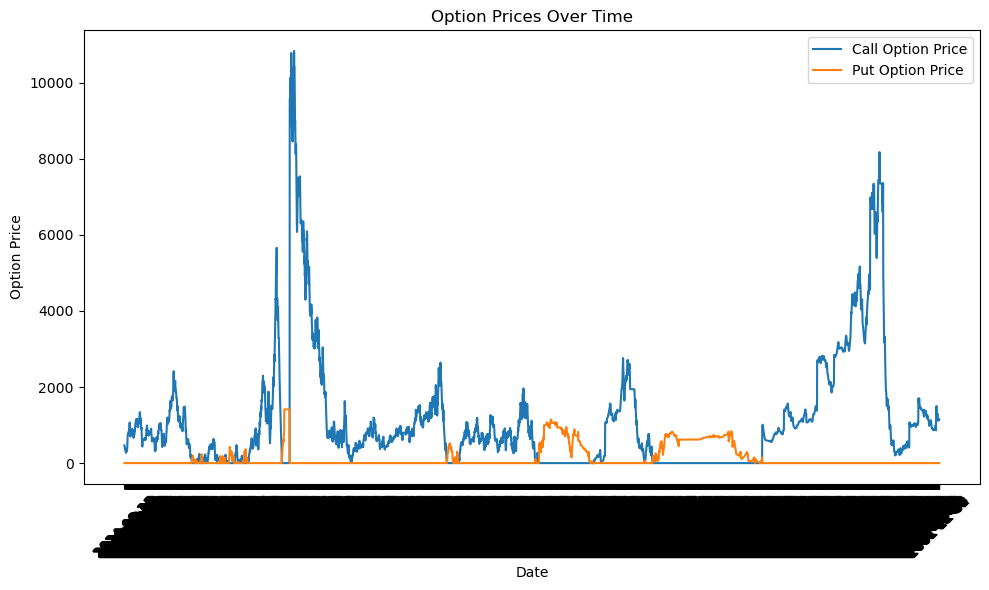

In [260]:
# Plot the option prices with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(option['Date'], option['C'], label='Call Option Price')
plt.plot(option['Date'], option['P'], label='Put Option Price')
plt.xlabel('Date')
plt.ylabel('Option Price')
plt.title('Option Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#import sqlite3
# Connect to an SQLite database (or create it if it doesn't exist)
#connection = sqlite3.connect('Option.db')  # Replace 'example.db' with your database name
#cursor = connection.cursor()


#data = pd.read_csv("c:/Users/aliho/Downloads/data1.csv")
#data.head(10)

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date' , 'index'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:12]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,2864,2871,2800,2829,53.948513,2802.213679,2778.975094,2796.040000,13.0,1,2864.0
1,2851,2924,2805,2864,56.810073,2808.098090,2780.658756,2796.940132,96.0,1,2851.0
2,2755,2892,2725,2851,55.439146,2812.183987,2782.051651,2797.656157,23.0,1,2755.0
3,2732,2794,2724,2755,46.551036,2806.737893,2781.515975,2797.091175,-12.0,0,2732.0
4,2744,2769,2705,2732,44.710997,2799.619998,2780.535461,2796.229040,-17.0,0,2744.0
5,2761,2774,2725,2744,45.906254,2794.322855,2779.811986,2795.537265,13.0,1,2761.0
6,2748,2786,2744,2761,47.624869,2791.149250,2779.439472,2795.079818,24.0,1,2748.0
7,2724,2777,2732,2748,46.416603,2787.039798,2778.816908,2794.456244,-12.0,0,2724.0
8,2736,2739,2698,2724,44.198569,2781.036007,2777.731425,2793.523049,-36.0,0,2736.0
9,2772,2770,2704,2736,45.591391,2776.746864,2776.905060,2792.761154,-20.0,0,2772.0


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.1859079  0.21345725 0.224341   ... 0.4898563  1.         0.1859079 ]
 [0.18484651 0.21739777 0.22474161 ... 0.50739645 1.         0.18484651]
 [0.17700849 0.21501859 0.21833186 ... 0.49196957 1.         0.17700849]
 ...
 [0.18027433 0.21182156 0.22402051 ... 0.48647506 0.         0.18027433]
 [0.18051927 0.20817844 0.22394039 ... 0.48668639 0.         0.18051927]
 [0.18068256 0.20892193 0.22410063 ... 0.4875317  1.         0.18068256]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

5240
[[[0.1859079  0.21345725 0.224341   ... 0.20160585 0.22603688 0.2309038 ]
  [0.18484651 0.21739777 0.22474161 ... 0.2021508  0.22626634 0.23103748]
  [0.17700849 0.21501859 0.21833186 ... 0.20252919 0.22645617 0.23114381]
  ...
  [0.16190398 0.19977695 0.20783591 ... 0.1999268  0.2265048  0.23051047]
  [0.16165905 0.19434944 0.20382982 ... 0.1980386  0.22593158 0.23007105]
  [0.16296538 0.1930855  0.20407019 ... 0.19630376 0.2253616  0.22963155]]

 [[0.18484651 0.21739777 0.22474161 ... 0.2021508  0.22626634 0.23103748]
  [0.17700849 0.21501859 0.21833186 ... 0.20252919 0.22645617 0.23114381]
  [0.17513063 0.20773234 0.21825174 ... 0.20202484 0.22638317 0.23105991]
  ...
  [0.16165905 0.19434944 0.20382982 ... 0.1980386  0.22593158 0.23007105]
  [0.16296538 0.1930855  0.20407019 ... 0.19630376 0.2253616  0.22963155]
  [0.1637002  0.19360595 0.20583287 ... 0.19487527 0.2248461  0.22922934]]

 [[0.17700849 0.21501859 0.21833186 ... 0.20252919 0.22645617 0.23114381]
  [0.17513063 0.2

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

4168
(4168, 30, 8)
(1042, 30, 8)
(4168, 1)
(1042, 1)
[[0.1637002 ]
 [0.16427172]
 [0.16451666]
 ...
 [0.20444154]
 [0.20452319]
 [0.20468648]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
211/251 [========================>.....] - ETA: 0s - loss: 0.0023

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

33/33 [==============================] - 1s 14ms/step
[0.5366331] [0.48647506]
[0.53727317] [0.48309383]
[0.5379599] [0.48351648]
[0.5387743] [0.4852071]
[0.5404022] [0.48457312]
[0.54304284] [0.48605241]
[0.5463163] [0.48562975]
[0.5499341] [0.48732037]
[0.55358994] [0.48943364]
[0.55712926] [0.49112426]


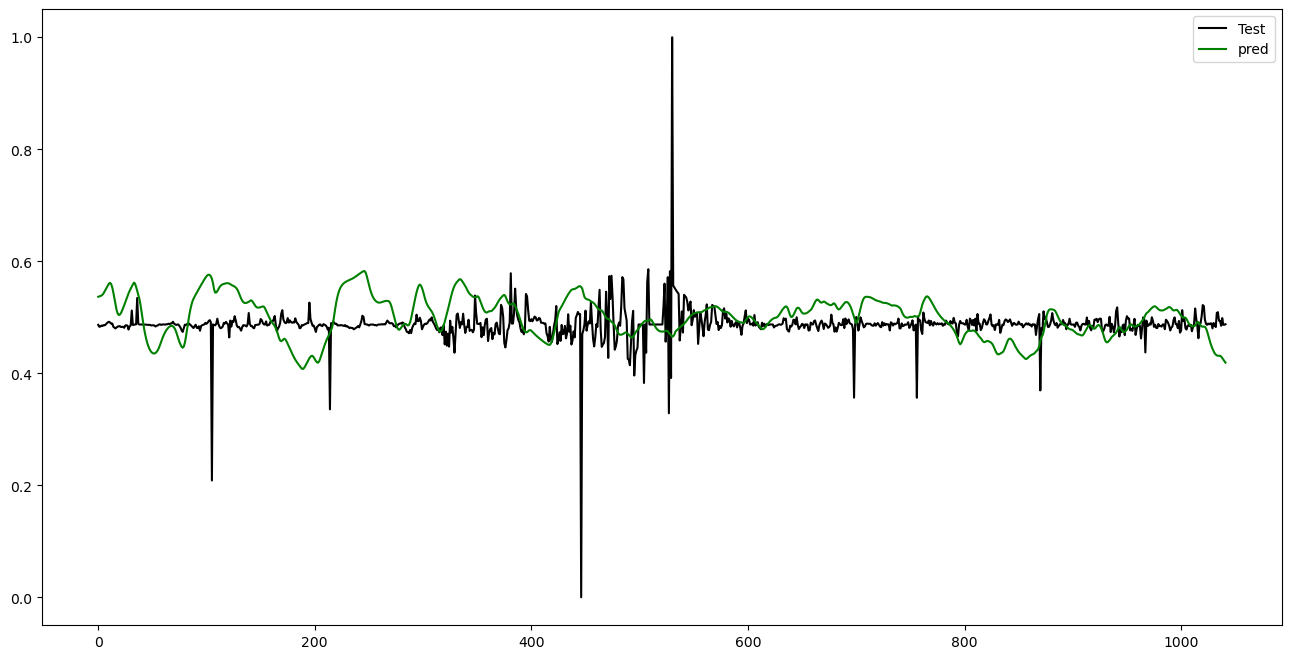

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()